In [1]:
import wandb
import pickle
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [2]:
qLearningCar = QLearning("rgb_array")

In [3]:
all_iterations = []
all_alphas = []
all_epsilons = []
all_gammas = []

In [4]:
iterations = 200000
all_iterations.append(iterations)

alpha = 0.99 #variacion permitida
all_alphas.append(alpha)

epsilon = 0.9 # -> más grande mas exploracion
all_epsilons.append(epsilon)

gamma = 0.999999  #futuro - learning rate - mas bajo mas greedy
all_gammas.append(gamma)

In [5]:
all_epsilons

[0.9]

In [ ]:
divPos = 33
divVel = 11

In [5]:
# start a new wandb run to track this script
wandb.init(
    # Dejar solo un proyecto
    project="MountainCar",
    
    # track hyperparameters and run metadata
    config={
        "initial_alpha": alpha,
        "initial_epsilon": epsilon,
        "initial_gamma": gamma,
        "Discretizacion_ Pos": divPos,
        "Discretizacion_ Vos": divVel,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irazoqui-santi (santiago-irazoqui). Use `wandb login --relogin` to force relogin


In [6]:

#qLearningCar.discretizar(divPos, divVel) #pasar variables de discretizacion desde ipynb

In [ ]:
pickle_in = open("Pickles\Q_-349-Pos_33_Vel_11.pkl","rb")
Old_Q = pickle.load(pickle_in)
Old_Q

In [8]:
#qLearningCar.setQ(Old_Q)

In [9]:
Q, initial_state_Q_list = qLearningCar.qLearning(iterations, alpha, epsilon, gamma)

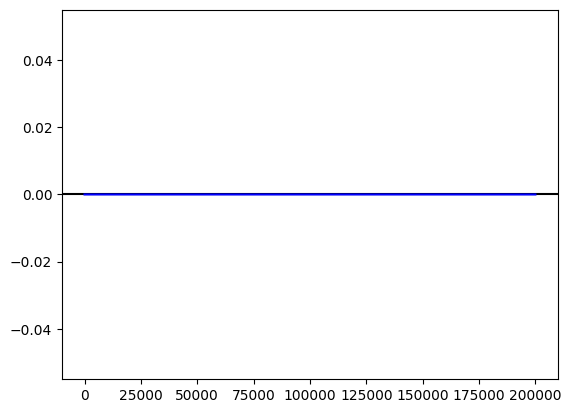

In [10]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), initial_state_Q_list, color='blue')

In [67]:
data = [[x, y] for (x, y) in zip(range(0, iterations), initial_state_Q_list)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Continued Q_train_1" : wandb.plot.line(table, "x", "y",
           title="#Continued 1 Q train")})

In [11]:
qLearningCar.execute(100)

In [11]:
qLearningCar.rewards

[-500.0, -500.0, -500.0, -349.29]

In [12]:
#tendria que subir la plot
wandb.log({"rewards": qLearningCar.rewards})

In [71]:
# log metrics to wandb --> these go on a separate table than the configuration in config.
wandb.log({
    "iterations": all_iterations, 
    "alphas": all_alphas, 
    "epsilons": all_epsilons, 
    "gammas": all_gammas, 
})

In [13]:
#finished uploading
wandb.finish()

total iterations,▁
total iterations,300000


In [74]:
pickle_out = open('Q_many_iterations_2.pkl', 'wb')
pickle.dump(Q, pickle_out)
pickle_out.close()

In [7]:
iterations_to_run = 100000
iterations_total = 0
while(iterations_total < 1200000):
    Q, initial_state_Q_list = qLearningCar.qLearning(iterations_to_run, alpha, epsilon, gamma)
    test_value = qLearningCar.execute(100)
    
    if(test_value > -500):
        pickle_out = open('Q_auto.pkl', 'wb')
        pickle.dump(Q, pickle_out)
        pickle_out.close()
        break

    iterations_total += iterations_to_run
    print(iterations_total)

    data = [[x, y] for (x, y) in zip(range(0, iterations), initial_state_Q_list)]
    table = wandb.Table(data=data, columns = ["x", "y"])
    wandb.log(
        {"Continued Q_train_1" : wandb.plot.line(table, "x", "y",
           title="#Continued 1 Q train")
        }
    )

100000
200000
300000


In [10]:
wandb.log({
    "total iterations": iterations_total 
})
iterations_total

300000